<h2><center>Electric-Vehicle _ Analysis

**1. Data** **Importing**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset of EV & Get records in it
vehicle_data=pd.read_csv("electric_vehicle.csv")
vehicle_data.shape

(112634, 17)

In [3]:
# Identifying the fields in data.
vehicle_data.columns.to_list()

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal Code',
 'Model Year',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

In [4]:
# Sample data
vehicle_data.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

**2. Data Cleaning**

In [5]:
# Removing spaces
vehicle_data.columns=vehicle_data.columns.str.replace(" ","_")


In [6]:
# Renaming particular columns
rename_cols={'Electric_Vehicle_Type':"Vehicle_Type",'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility':"Vehicle_Eligibility",
            'Legislative_District':"District"}
vehicle_data.rename(columns=rename_cols, inplace=True)
vehicle_data.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Vehicle_Type', 'Vehicle_Eligibility',
       'Electric_Range', 'Base_MSRP', 'District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [7]:
# Information about data.
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   VIN_(1-10)           112634 non-null  object 
 1   County               112634 non-null  object 
 2   City                 112634 non-null  object 
 3   State                112634 non-null  object 
 4   Postal_Code          112634 non-null  int64  
 5   Model_Year           112634 non-null  int64  
 6   Make                 112634 non-null  object 
 7   Model                112614 non-null  object 
 8   Vehicle_Type         112634 non-null  object 
 9   Vehicle_Eligibility  112634 non-null  object 
 10  Electric_Range       112634 non-null  int64  
 11  Base_MSRP            112634 non-null  int64  
 12  District             112348 non-null  float64
 13  DOL_Vehicle_ID       112634 non-null  int64  
 14  Vehicle_Location     112610 non-null  object 
 15  Electric_Utility 

In [8]:
# Get the count of null values.
filt_veh=vehicle_data.isnull().sum().sort_values(ascending=False)
filt_veh

Electric_Utility       443
District               286
Vehicle_Location        24
Model                   20
VIN_(1-10)               0
Vehicle_Eligibility      0
DOL_Vehicle_ID           0
Base_MSRP                0
Electric_Range           0
Vehicle_Type             0
County                   0
Make                     0
Model_Year               0
Postal_Code              0
State                    0
City                     0
2020_Census_Tract        0
dtype: int64

In [9]:
# defining a function for percent of null values
def na_percent(data):

    miss = (data[data>0]*100 / len(vehicle_data))
    return miss

In [10]:
# Calling the function with respect to data
missing_percentage = na_percent(filt_veh)
print(missing_percentage)

Electric_Utility    0.393309
District            0.253920
Vehicle_Location    0.021308
Model               0.017757
dtype: float64


In [11]:
# Filter columns with missing values greater than zero with mode.
def replace_na(data):
    lst = data[data > 0].index
    for item in lst:
        vehicle_data[item].fillna(vehicle_data[item].mode()[0], inplace=True)

In [12]:
replace_na(filt_veh)

In [13]:
print(vehicle_data.isna().sum())

VIN_(1-10)             0
County                 0
City                   0
State                  0
Postal_Code            0
Model_Year             0
Make                   0
Model                  0
Vehicle_Type           0
Vehicle_Eligibility    0
Electric_Range         0
Base_MSRP              0
District               0
DOL_Vehicle_ID         0
Vehicle_Location       0
Electric_Utility       0
2020_Census_Tract      0
dtype: int64


**3.Segregating columns**

In [14]:
vehicle_data.dtypes.value_counts()

object     10
int64       6
float64     1
Name: count, dtype: int64

In [15]:
#Datatype_vehicle
int_vehicle=vehicle_data.select_dtypes(["int"])
float_vehicle=vehicle_data.select_dtypes(["float"])
obj_vehicle=vehicle_data.select_dtypes(["O"])

In [16]:
int_vehicle.columns.to_list()

['Postal_Code',
 'Model_Year',
 'Electric_Range',
 'Base_MSRP',
 'DOL_Vehicle_ID',
 '2020_Census_Tract']

In [17]:
float_vehicle.columns.to_list()

['District']

In [18]:
obj_vehicle.columns.to_list()

['VIN_(1-10)',
 'County',
 'City',
 'State',
 'Make',
 'Model',
 'Vehicle_Type',
 'Vehicle_Eligibility',
 'Vehicle_Location',
 'Electric_Utility']

In [19]:
# Identifying duplicated values count
vehicle_data.duplicated().sum()

0

**4. Data Exploration**

In [20]:
def Univariate_Numerical_Analysis(disc_data):
    for col in disc_data:
        print("*"*10,col,"*"*10)
        print(disc_data[col].agg(["min","max","mean","median","std","skew","kurtosis"]),"\n")



In [21]:
# calling integer columns
Univariate_Numerical_Analysis(int_vehicle)

********** Postal_Code **********
min          1730.000000
max         99701.000000
mean        98156.226850
median      98119.000000
std          2648.733064
skew          -27.955285
kurtosis      820.874840
Name: Postal_Code, dtype: float64 

********** Model_Year **********
min         1997.000000
max         2023.000000
mean        2019.003365
median      2020.000000
std            2.892364
skew          -0.817579
kurtosis      -0.001160
Name: Model_Year, dtype: float64 

********** Electric_Range **********
min           0.000000
max         337.000000
mean         87.812987
median       32.000000
std         102.334216
skew          0.817103
kurtosis     -0.876312
Name: Electric_Range, dtype: float64 

********** Base_MSRP **********
min              0.000000
max         845000.000000
mean          1793.439681
median           0.000000
std          10783.753486
skew            10.100497
kurtosis       371.695682
Name: Base_MSRP, dtype: float64 

********** DOL_Vehicle_ID ********

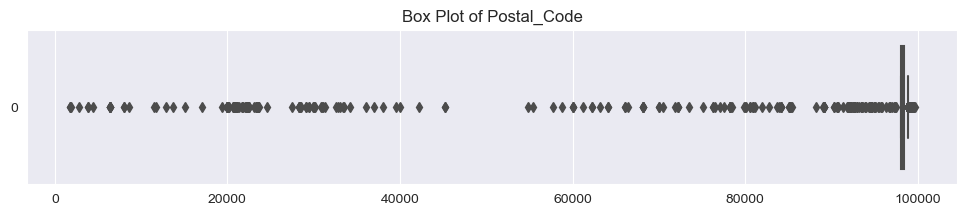

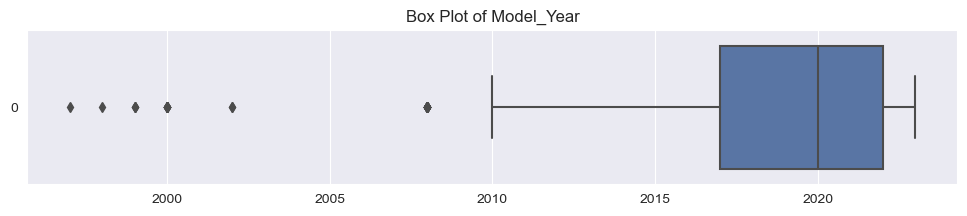

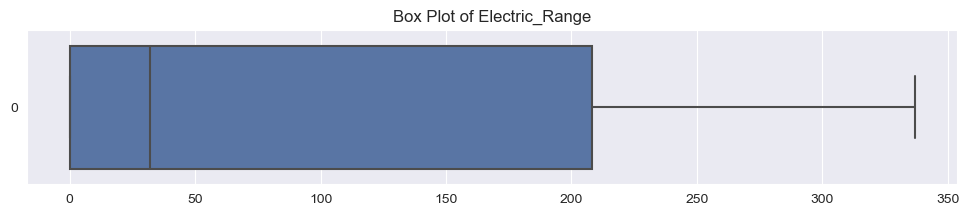

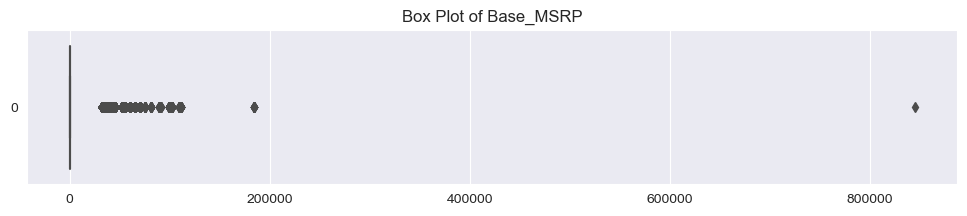

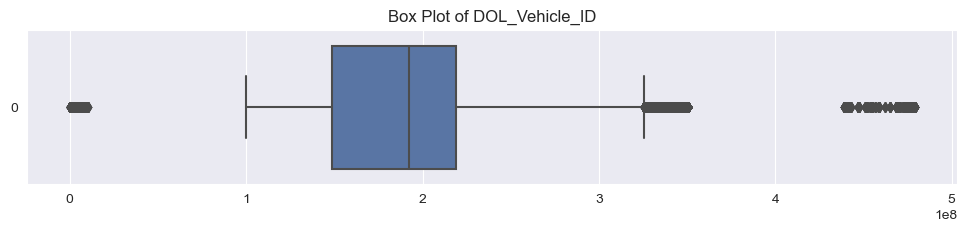

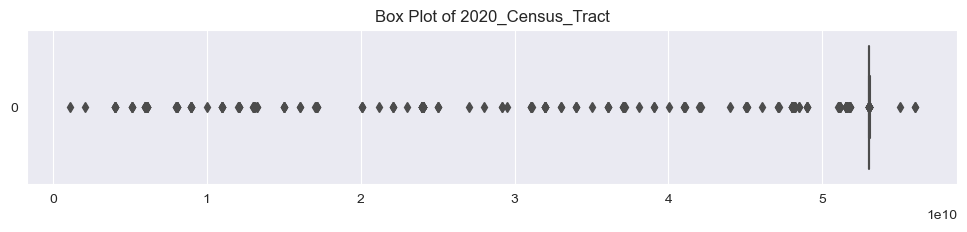

In [22]:
# Outliers detection in numeric columns
import matplotlib.pyplot as plt
int_col=int_vehicle.columns.to_list()
sb.set({"figure.figsize":(12,2)})
for i in range(len(int_col)):
    sb.boxplot(vehicle_data[int_col[i]],orient="h")
    plt.title(f'Box Plot of {int_col[i]}')
    plt.show()

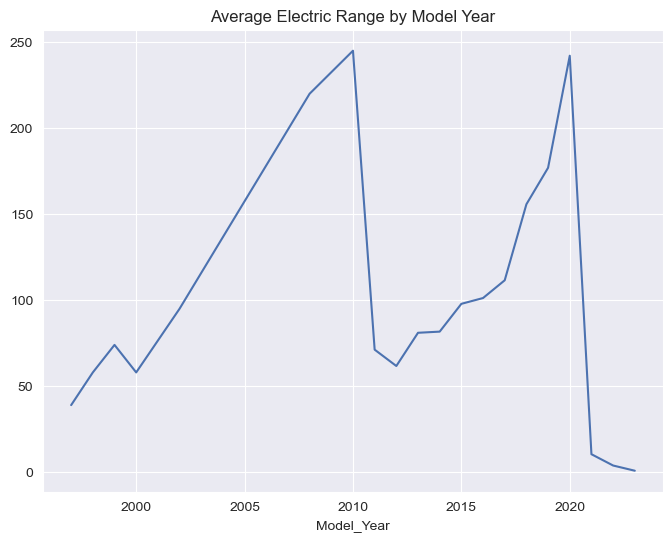

In [23]:
# Group by Model_Year and calculate the average Electric_Range
plt.figure(figsize=(8, 6))
model_year_range = vehicle_data.groupby('Model_Year')['Electric_Range'].mean()
sb.lineplot(x=model_year_range.index, y=model_year_range.values)
plt.title('Average Electric Range by Model Year')
plt.show()


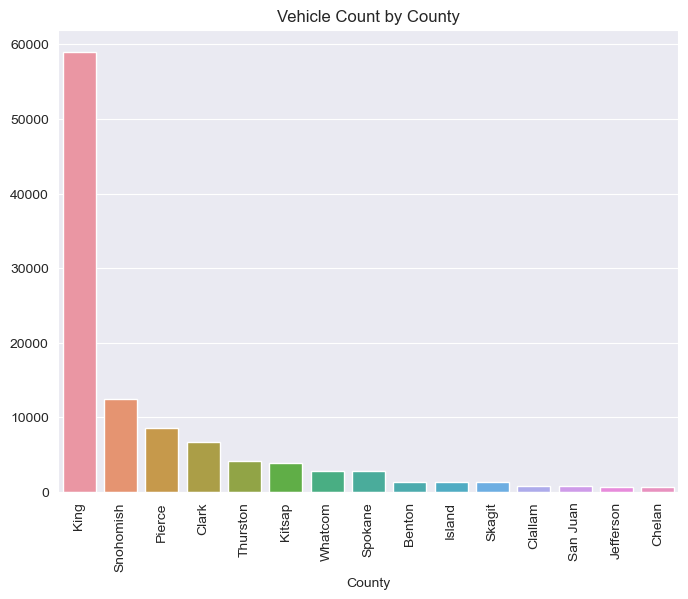

In [24]:
# Group by County and calculate the count of vehicles
plt.figure(figsize=(8, 6))

county_vehicle_count = vehicle_data.groupby('County')['Vehicle_Location'].count()
county_vehicle_count = county_vehicle_count.sort_values(ascending=False)[:15]
sb.barplot(x=county_vehicle_count.index, y=county_vehicle_count.values)
plt.title('Vehicle Count by County')
plt.xticks(rotation=90)
plt.show()

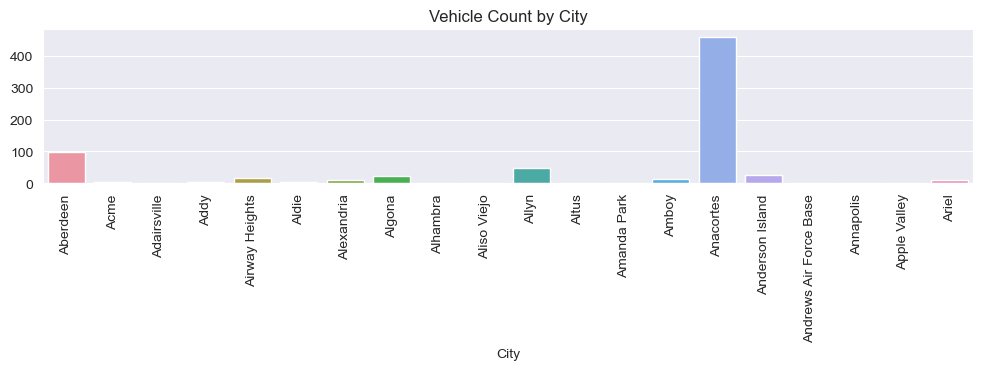

In [25]:

# Group by City and calculate the count of vehicles
city_vehicle_count = vehicle_data.groupby('City')['Vehicle_Location'].count()
sb.barplot(x=city_vehicle_count.index[:20], y=city_vehicle_count.values[:20])
plt.title('Vehicle Count by City')
plt.xticks(rotation=90)
plt.show()


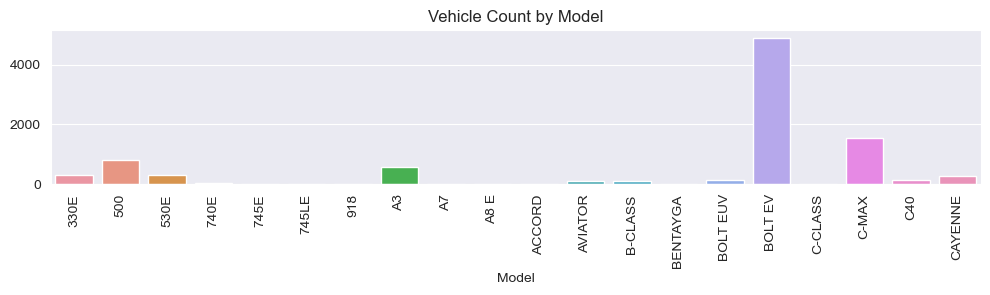

In [26]:

# Group by Model and calculate the count of vehicles
model_vehicle_count = vehicle_data.groupby('Model')['Vehicle_Location'].count()
sb.barplot(x=model_vehicle_count.index[:20], y=model_vehicle_count.values[:20])
plt.title('Vehicle Count by Model')
plt.xticks(rotation=90)
plt.show()


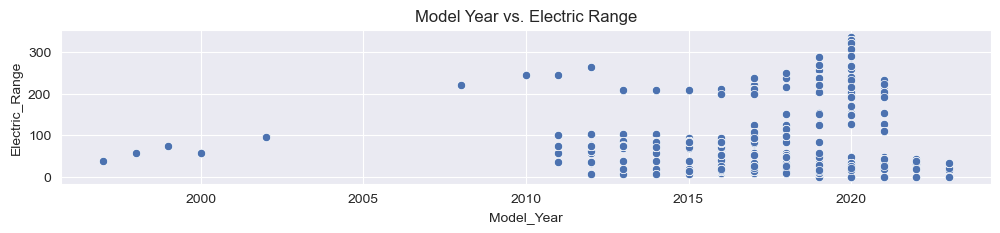

In [27]:
# Bivariate plot: Model Year vs. Electric Range
sb.scatterplot(x='Model_Year', y='Electric_Range', data=vehicle_data)
plt.title('Model Year vs. Electric Range')
plt.show()


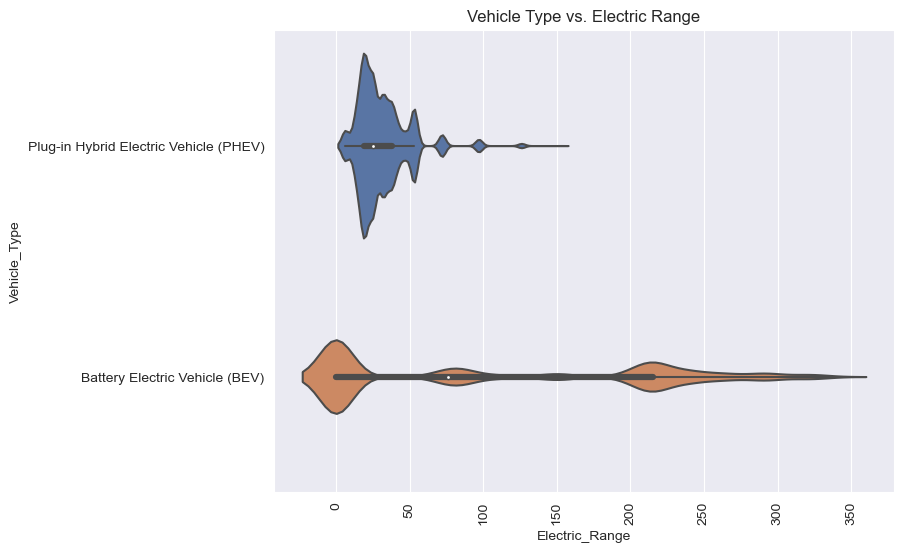

In [28]:
# Vehicle Type vs. Electric Range
plt.figure(figsize=(8, 6))
sb.violinplot(y='Vehicle_Type', x='Electric_Range', data=vehicle_data)
plt.title('Vehicle Type vs. Electric Range')
plt.xticks(rotation=90)
plt.show()



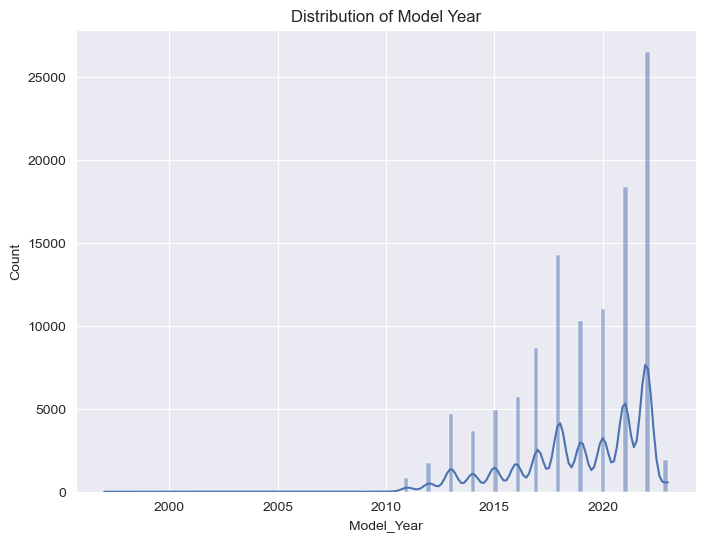

In [29]:
# Model Year distribution
plt.figure(figsize=(8, 6))
sb.histplot(vehicle_data['Model_Year'], kde=True)
plt.title('Distribution of Model Year')
plt.show()


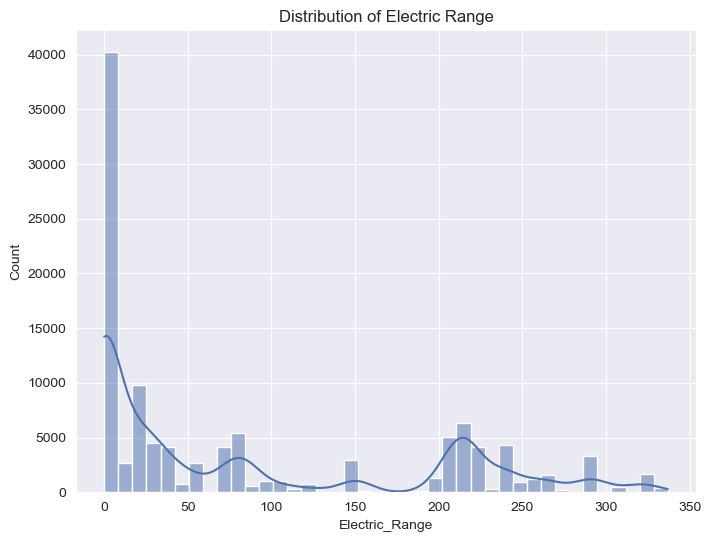

In [30]:
# Electric Range distribution
plt.figure(figsize=(8, 6))
sb.histplot(vehicle_data['Electric_Range'], kde=True)
plt.title('Distribution of Electric Range')
plt.show()


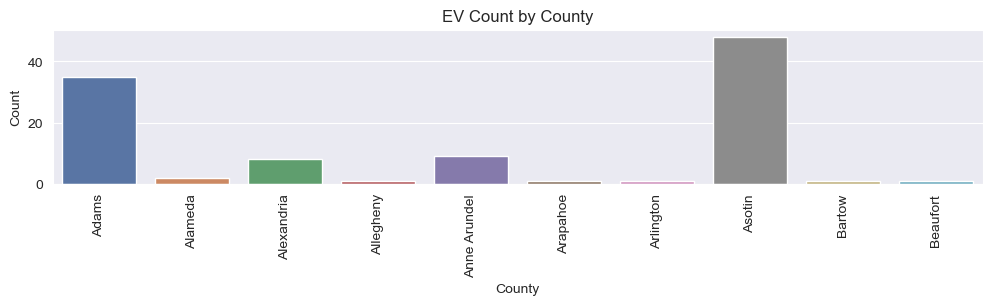

In [31]:
# County-wise EV count
county_ev_count = vehicle_data.groupby('County').size().reset_index(name='Count')[:10]
sb.barplot(x='County', y='Count', data=county_ev_count)
plt.xticks(rotation=90)
plt.title('EV Count by County')
plt.show()


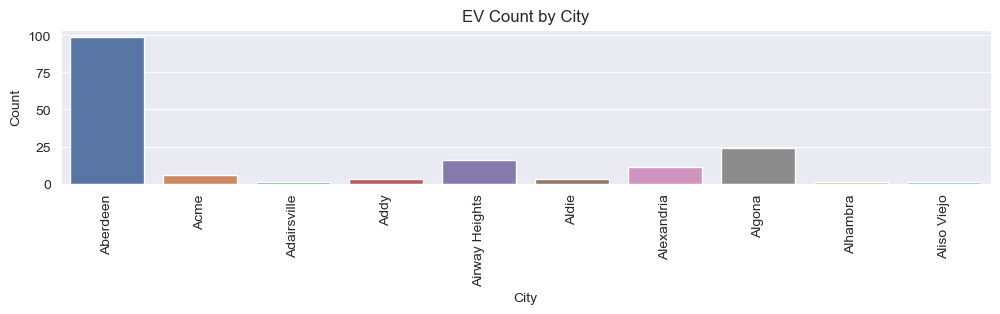

In [32]:
# City-wise EV count
city_ev_count = vehicle_data.groupby('City').size().reset_index(name='Count')[:10]
sb.barplot(x='City', y='Count', data=city_ev_count)
plt.xticks(rotation=90)
plt.title('EV Count by City')
plt.show()


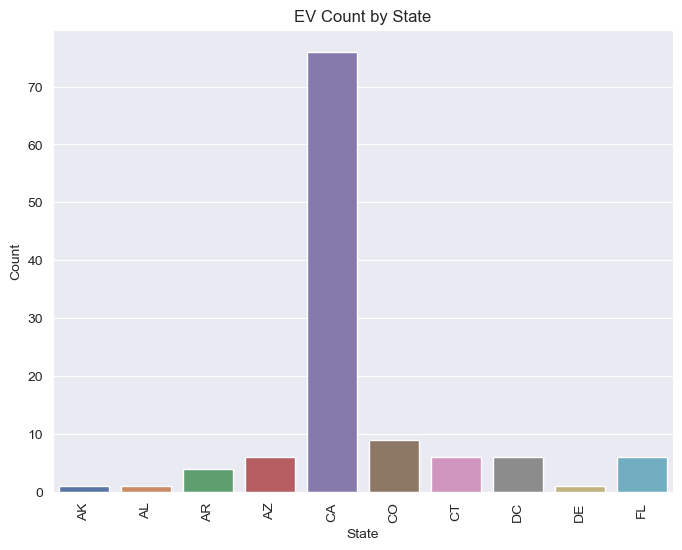

In [33]:
# State-wise EV count
plt.figure(figsize=(8, 6))
state_ev_count = vehicle_data.groupby('State').size().reset_index(name='Count')[:10]
sb.barplot(x='State', y='Count', data=state_ev_count)
plt.xticks(rotation=90)
plt.title('EV Count by State')
plt.show()


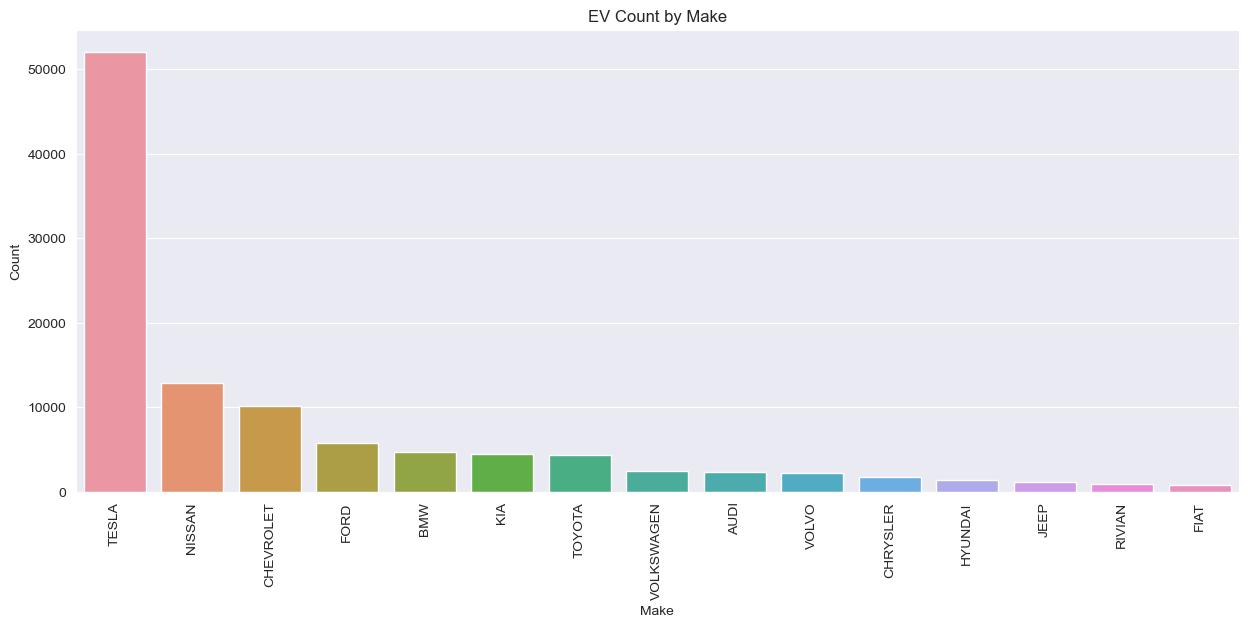

In [34]:
plt.figure(figsize=(15, 6))
# Make-wise EV count
make_ev_count = vehicle_data.groupby('Make').size().sort_values(ascending=False).reset_index(name='Count')[:15]
sb.barplot(x='Make', y='Count', data=make_ev_count)
plt.xticks(rotation=90)
plt.title('EV Count by Make')
plt.show()


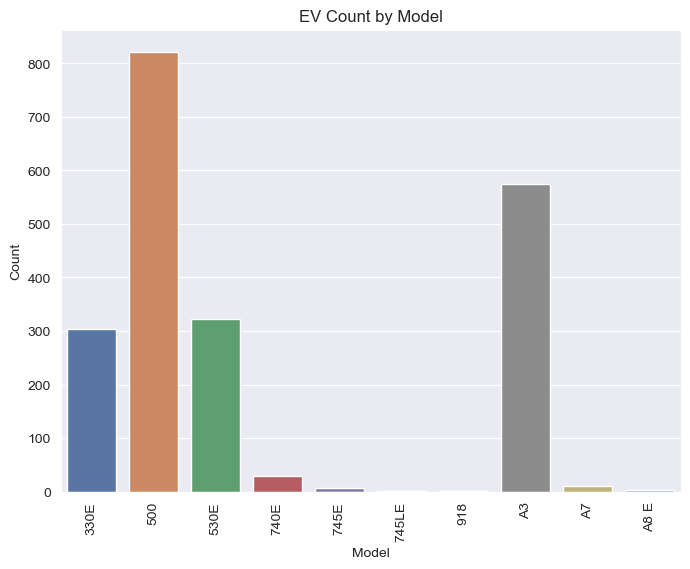

In [35]:
# Model-wise EV count
plt.figure(figsize=(8, 6))
model_ev_count = vehicle_data.groupby('Model').size().reset_index(name='Count')[:10]
sb.barplot(x='Model', y='Count', data=model_ev_count)
plt.xticks(rotation=90)
plt.title('EV Count by Model')
plt.show()


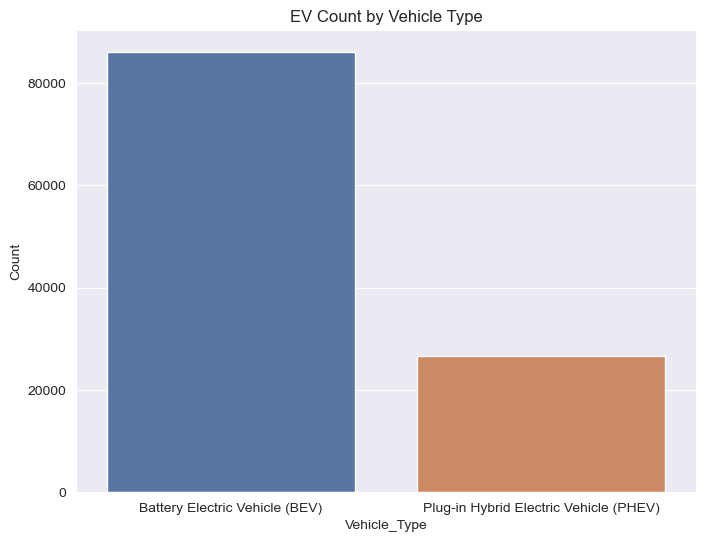

In [36]:
# Vehicle Type-wise EV count
plt.figure(figsize=(8, 6))
vehicle_type_ev_count = vehicle_data.groupby('Vehicle_Type').size().reset_index(name='Count')
sb.barplot(x='Vehicle_Type', y='Count', data=vehicle_type_ev_count)
plt.xticks(rotation=360)
plt.title('EV Count by Vehicle Type')
plt.show()


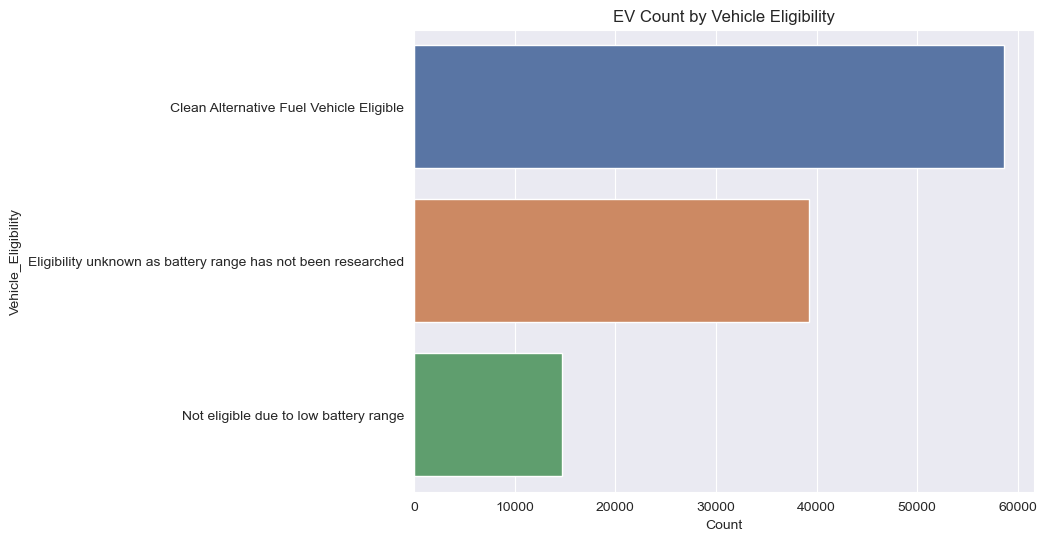

In [37]:
# Vehicle Eligibility-wise EV count
plt.figure(figsize=(8, 6))
vehicle_eligibility_ev_count = vehicle_data.groupby('Vehicle_Eligibility').size().reset_index(name='Count')
sb.barplot(y='Vehicle_Eligibility', x='Count', data=vehicle_eligibility_ev_count)
plt.title('EV Count by Vehicle Eligibility')
plt.show()



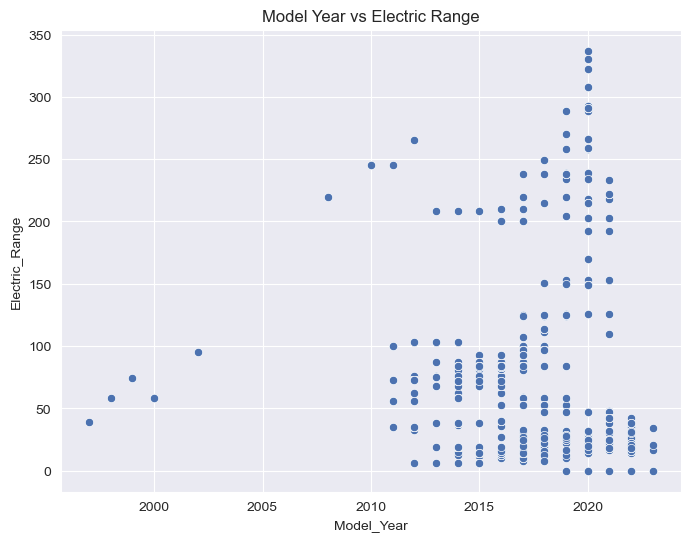

In [38]:
# Relationship between Model Year and Electric Range
plt.figure(figsize=(8, 6))
sb.scatterplot(x='Model_Year', y='Electric_Range', data=vehicle_data)
plt.title('Model Year vs Electric Range')
plt.show()


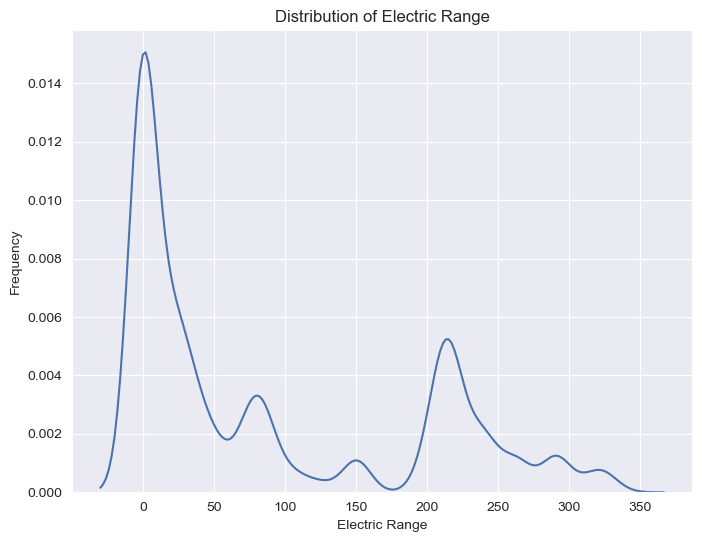

In [39]:
# KDE of Electric Range
plt.figure(figsize=(8, 6))
sb.kdeplot(int_vehicle['Electric_Range'])
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()


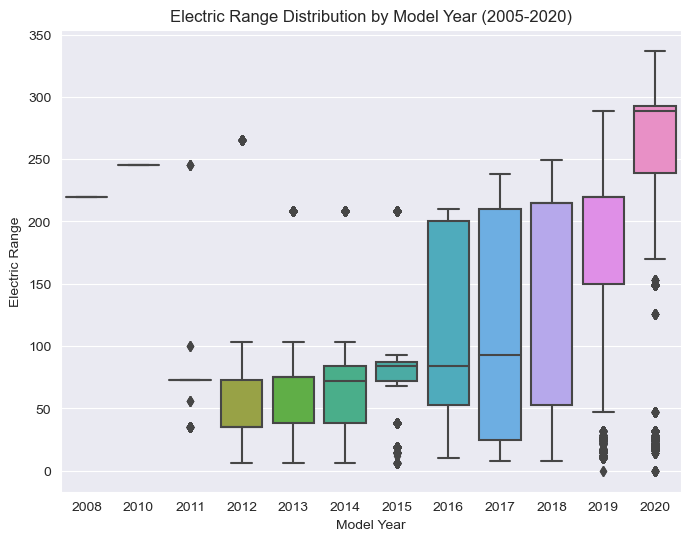

In [40]:
# code to plt bewween 2005 to 2020 for above plot

plt.figure(figsize=(8, 6))
sb.boxplot(x='Model_Year', y='Electric_Range', data=int_vehicle[(int_vehicle['Model_Year'] >= 2005) & 
                                                                (int_vehicle['Model_Year'] <= 2020)])
plt.title('Electric Range Distribution by Model Year (2005-2020)')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()


<Figure size 1000x800 with 0 Axes>

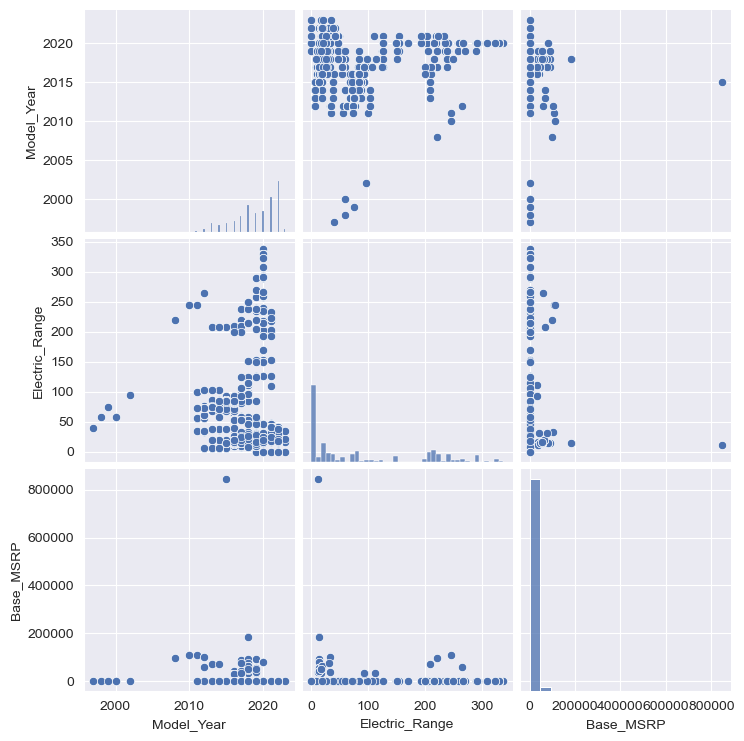

In [41]:
#Pairplot for selected columns
plt.figure(figsize=(10, 8))
sb.pairplot(int_vehicle[['Model_Year', 'Electric_Range', 'Base_MSRP']])
plt.show()


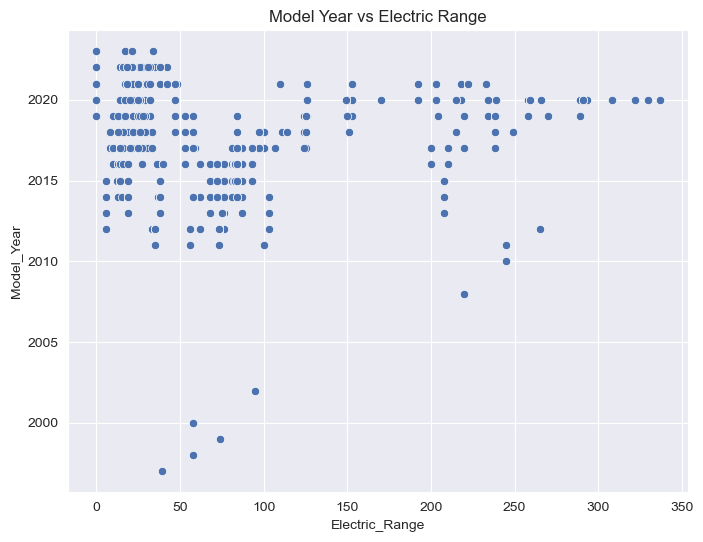

In [42]:
# Scatter plot of 'Model_Year' vs 'Electric_Range'
plt.figure(figsize=(8, 6))
sb.scatterplot(y='Model_Year', x='Electric_Range', data=vehicle_data)
plt.title('Model Year vs Electric Range')
plt.show()


In [43]:
vehicle_data.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Vehicle_Type', 'Vehicle_Eligibility',
       'Electric_Range', 'Base_MSRP', 'District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

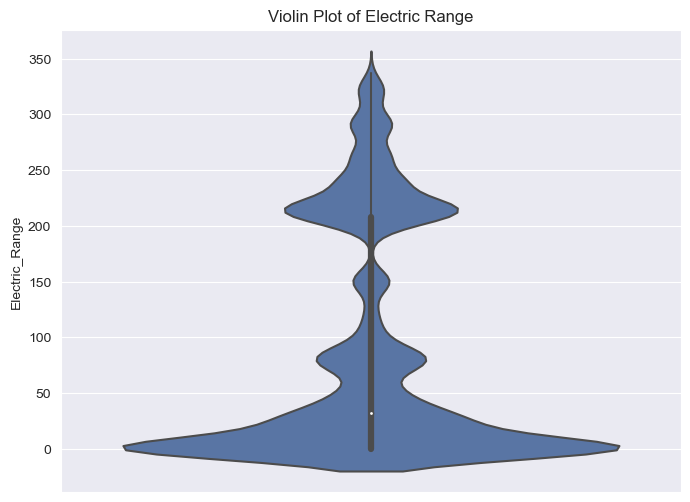

In [44]:

# Violin plot of 'Electric_Range'
plt.figure(figsize=(8, 6))

sb.violinplot(y='Electric_Range', data=vehicle_data)
plt.title('Violin Plot of Electric Range')
plt.show()


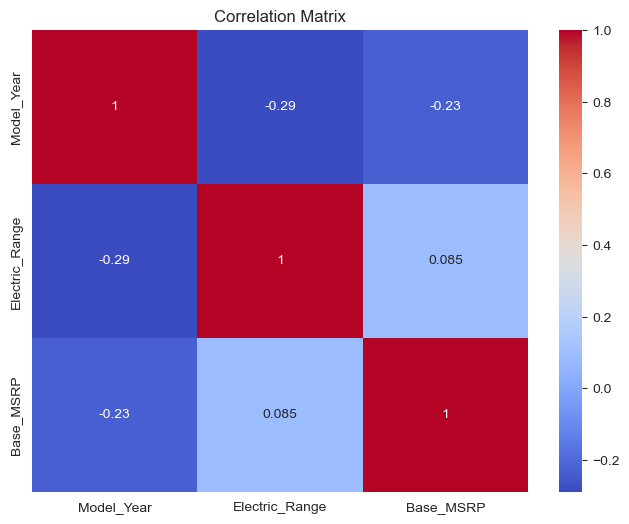

In [45]:
# Heatmap of correlation between numerical columns
plt.figure(figsize=(8, 6))

correlation_matrix = vehicle_data[['Model_Year', 'Electric_Range', 'Base_MSRP']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


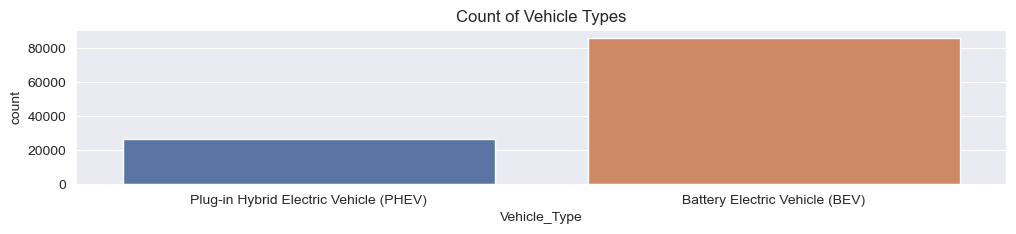

In [46]:
# Count plot of 'Vehicle_Type'
sb.countplot(x='Vehicle_Type', data=vehicle_data)
plt.title('Count of Vehicle Types')
plt.show()


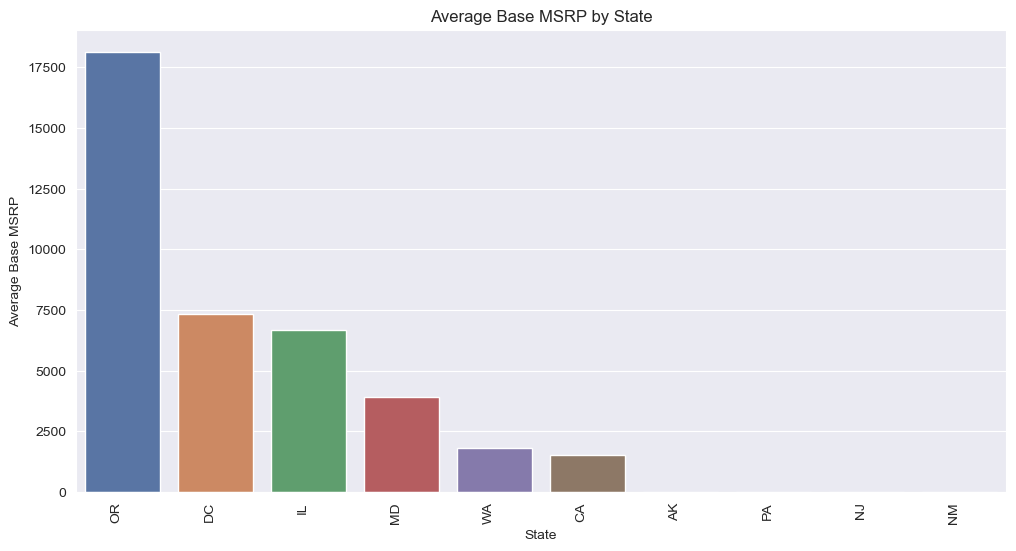

In [47]:
# Bar plot of average 'Base_MSRP' for each 'State'
plt.figure(figsize=(12, 6))
state_avg_msrp = vehicle_data.groupby('State')['Base_MSRP'].mean().sort_values(ascending=False)[:10]
sb.barplot(x=state_avg_msrp.index, y=state_avg_msrp.values)
plt.title('Average Base MSRP by State')
plt.xlabel('State')
plt.ylabel('Average Base MSRP')
plt.xticks(rotation=90, ha='right')
plt.show()


In [48]:
px.scatter(data_frame=int_vehicle,x='Model_Year',y='Base_MSRP')

In [50]:
# Count of each EV Vehicle_Type for each year
vehtype_count = vehicle_data.groupby(['Model_Year', 'Vehicle_Type']).size().reset_index(name='Count')

fig = px.bar(
    vehtype_count,
    x='Vehicle_Type',
    y='Count',
    animation_frame='Model_Year',
    animation_group='Vehicle_Type',
    range_y=[0, vehtype_count['Count'].max() + 10],
    title='EV type Count Over the Years',)

fig.update_layout(
    xaxis_title='EV Vehicle_Type',
    yaxis_title='Count',
    showlegend=False,
    title_font_size=24,)



fig.show()

In [51]:
# EV Make for each year
ev_make_count = vehicle_data.groupby(['Model_Year', 'Make']).size().reset_index(name='Count')

# Create the Racing Bar Plot (horizontal bars)
fig = px.bar(
    ev_make_count,
    y='Make',
    x='Count',
    range_x=[0, ev_make_count['Count'].max() + 10],
    animation_frame='Model_Year',
    animation_group='Make',
    orientation='h',
    title='EV Make Count Over the Years'
)

fig.show()


In [53]:
#'Model_Year' and 'Model' count of each EV .
model_count = vehicle_data.groupby(['Model_Year', 'Model']).size().reset_index(name='Count')

fig = px.bar(
    model_count,
    y='Model',
    x='Count',
    range_x=[0, model_count['Count'].max() + 10],
    animation_frame='Model_Year',
    animation_group='Model',
    orientation='h',
    title='EV Model Count Over the Years'
)

fig.show()


In [54]:
# Group data by 'State' to get the count of EV vehicles in each state
ev_state_count = vehicle_data.groupby('State').size().reset_index(name='EV Count')

fig = px.choropleth(
    ev_state_count,
    locations='State',
    locationmode='USA-states', 
    color='EV Count',
    scope="usa",
    title='Number of EV Vehicles by State',
    color_continuous_scale=px.colors.sequential.Plasma,
)

fig.show()


In [55]:
# Group data by 'State' & "Model" to get the count of EV vehicles in each state

model_state = vehicle_data.groupby(['State', 'Model']).size().reset_index(name='Count')
fig = px.choropleth(model_state,
                    locations='State', locationmode="USA-states",
                    color='Count', scope="usa", hover_data=['Model'],
                    title='EV Model Distribution by State')
fig.show()

<h4>Final Code To Generate Individual Clips

In [72]:
# Desired DataFrame
model_count = vehicle_data.groupby(['Model_Year', 'Model']).size().reset_index(name='Count')

# Pivot the DataFrame to have index and Column.
df_pivot = model_count.pivot(index='Model_Year', columns='Model', values='Count').fillna(0)

# Create the racing bar chart video
bcr.bar_chart_race(
    df=df_pivot,
    filename="final3.mp4",
    orientation="h",
    sort="desc",
    n_bars=10,
    steps_per_period=50,
    period_length=1000,
    
    title={
        'label': 'Year wise Counts of each Model Vehicle'  },  
    period_label={
        'x': .95, 'y': .15,
        'ha': 'right',
        'va': 'center',
        'size': 25,
        'weight': 'semibold'
    },

)

print("Video saved as final.mp4")


Video saved as final.mp4


<center>---- END ----